In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

In [ ]:
def convolutional_model():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [ ]:
model = convolutional_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 33s - loss: 0.2761 - accuracy: 0.9231 - val_loss: 0.1090 - val_accuracy: 0.9685 - 33s/epoch - 111ms/step
Epoch 2/10
300/300 - 21s - loss: 0.0857 - accuracy: 0.9752 - val_loss: 0.0616 - val_accuracy: 0.9807 - 21s/epoch - 70ms/step
Epoch 3/10
300/300 - 17s - loss: 0.0589 - accuracy: 0.9824 - val_loss: 0.0562 - val_accuracy: 0.9819 - 17s/epoch - 56ms/step
Epoch 4/10
300/300 - 19s - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0478 - val_accuracy: 0.9843 - 19s/epoch - 62ms/step
Epoch 5/10
300/300 - 17s - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.0468 - val_accuracy: 0.9847 - 17s/epoch - 58ms/step
Epoch 6/10
300/300 - 17s - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0437 - val_accuracy: 0.9857 - 17s/epoch - 57ms/step
Epoch 7/10
300/300 - 21s - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0397 - val_accuracy: 0.9868 - 21s/epoch - 68ms/step
Epoch 8/10
300/300 - 18s - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0378 - val_accuracy: 0.9864 - 18s/epoch - 58ms/step

In [ ]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.987500011920929 
 Error: 1.2499988079071045


In [ ]:
# prompt:

model.save('/content/drive/MyDrive/MNIST_CNN.h5')


Accuracy: 0.987500011920929 
 Error: 1.2499988079071045
313/313 [==============================] - 1s 4ms/step


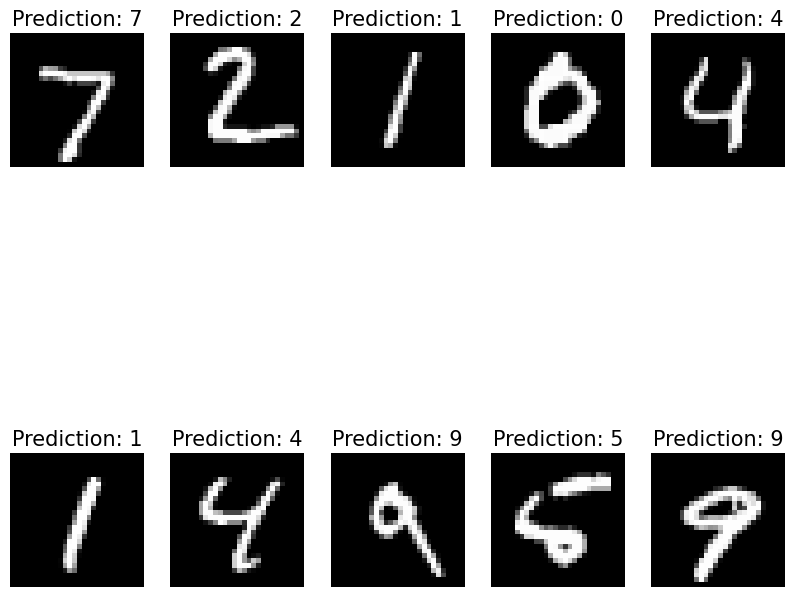

In [ ]:
# prompt:

import matplotlib.pyplot as plt
import numpy as np
# load the saved model
model = keras.models.load_model('/content/drive/MyDrive/MNIST_CNN.h5')

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

# make predictions
predictions = model.predict(X_test)

# plot the first 10 predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Prediction: {}".format(np.argmax(predictions[i])), fontsize=15)
    plt.axis('off')
plt.show()

In [ ]:
# prompt:

# Save the model to a file
model.save('/content/drive/MyDrive/MNIST_CNN_2.h5')

# Load the model from the file
model = keras.models.load_model('/content/drive/MyDrive/MNIST_CNN_2.h5')
